# Imports, loading data and EDA

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [11]:
!git clone https://github.com/slatkowski/autos_project
df = pd.read_csv('autos_project/autos.csv')

fatal: destination path 'autos_project' already exists and is not an empty directory.


In [12]:
df.head(5)

index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  ...  \
0   Angebot    480   test         NaN                1993    manuell  ...   
1   Angebot  18300   test       coupe                2011    manuell  ...   
2   Angebot   9800   test         suv                2004  automatik  ...   
3   Angebot   1500   test  kleinwagen                2001    manuell  ...   
4   Angebot   3600   test  kleinwagen                2008    manuell  ...   

   model kilometer  monthOfRegistration  fuelType       brand  \
0   golf    150000                    0    benzin  volkswagen   
1    NaN    125000                    5    diesel        audi   
2  grand    125000                    8    diesel        jeep   
3   golf    150000                    6    benzin  volkswagen   
4  fabia     90000                    7    diesel       skoda   

  notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0               NaN  2016-03-24 00:00:00            0       70435   
1                ja  2016-03-24 00:00:00            0       66954   
2               NaN  2016-03-14 00:00:00            0       90480   
3              nein  2016-03-17 00:00:00            0       91074   
4              nein  2016-03-31 00:00:00            0       60437   

              lastSeen  
0  2016-04-07 03:16:57  
1  2016-04-07 01:46:50  
2  2016-04-05 12:47:46  
3  2016-03-17 17:40:17  
4  2016-04-06 10:17:21  

[5 rows x 21 columns]

In [13]:
df['index'].is_unique

True

In [14]:
df.set_index('index', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [15]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [16]:
'''Użycie metody describe z ograniczeniewm wyników do dwóch miejsc po przecinku'''

df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price yearOfRegistration    powerPS  kilometer  \
count      371528.00          371528.00  371528.00  371528.00   
mean        17295.14            2004.58     115.55  125618.69   
std       3587953.74              92.87     192.14   40112.34   
min             0.00            1000.00       0.00    5000.00   
25%          1150.00            1999.00      70.00  125000.00   
50%          2950.00            2003.00     105.00  150000.00   
75%          7200.00            2008.00     150.00  150000.00   
max    2147483647.00            9999.00   20000.00  150000.00   

      monthOfRegistration nrOfPictures postalCode  
count           371528.00    371528.00  371528.00  
mean                 5.73         0.00   50820.67  
std                  3.71         0.00   25799.08  
min                  0.00         0.00    1067.00  
25%                  3.00         0.00   30459.00  
50%                  6.00         0.00   49610.00  
75%                  9.00         0.00   71546.00  
max                 12.00         0.00   99998.00

In [17]:
df.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [18]:
'''Wyodrębnienie 5 najpopularniejszych marek samochodów potrzebnych do modelu'''

df = df.loc[(df['brand'] == 'volkswagen') | (df['brand'] == 'bmw') | (df['brand'] == 'mercedes_benz') | (df['brand'] == 'opel') | (df['brand'] == 'audi')]

'''Ograniczenie danych do poszczególnych wartości'''

df = df[(df['yearOfRegistration'] >= 1980) & (df['yearOfRegistration'] <= 2016)]
df = df[(df['price'] >= 250) & (df['price'] <= 40000)]
df = df[(df['powerPS'] >= 40) & (df['powerPS'] <= 500)]


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188715 entries, 1 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          188715 non-null  object
 1   name                 188715 non-null  object
 2   seller               188715 non-null  object
 3   offerType            188715 non-null  object
 4   price                188715 non-null  int64 
 5   abtest               188715 non-null  object
 6   vehicleType          182269 non-null  object
 7   yearOfRegistration   188715 non-null  int64 
 8   gearbox              186069 non-null  object
 9   powerPS              188715 non-null  int64 
 10  model                183241 non-null  object
 11  kilometer            188715 non-null  int64 
 12  monthOfRegistration  188715 non-null  int64 
 13  fuelType             179684 non-null  object
 14  brand                188715 non-null  object
 15  notRepairedDamage    162453 non-nu

In [19]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151723 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          151723 non-null  object
 1   name                 151723 non-null  object
 2   seller               151723 non-null  object
 3   offerType            151723 non-null  object
 4   price                151723 non-null  int64 
 5   abtest               151723 non-null  object
 6   vehicleType          151723 non-null  object
 7   yearOfRegistration   151723 non-null  int64 
 8   gearbox              151723 non-null  object
 9   powerPS              151723 non-null  int64 
 10  model                151723 non-null  object
 11  kilometer            151723 non-null  int64 
 12  monthOfRegistration  151723 non-null  int64 
 13  fuelType             151723 non-null  object
 14  brand                151723 non-null  object
 15  notRepairedDamage    151723 non-nu

In [20]:
'''Podział postal codów na poszczególne rozmieszczenia terytorialne'''

bins = [0, 9999, 19999, 29999, 39999,
        49999, 59999, 69999, 79999, 89999, 99999]

df['postalCode'] = pd.cut(df['postalCode'], bins=bins,
       labels=['Leitzone 0', 'Leitzone 1', 'Leitzone 2', 'Leitzone 3',
              'Leitzone 4', 'Leitzone 5', 'Leitzone 6', 'Leitzone 7',
              'Leitzone 8', 'Leitzone 9'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_list = ['gearbox', 'vehicleType', 'notRepairedDamage', 'fuelType', 'postalCode']

for i in encode_list:
    df[i] = le.fit_transform(df[i])
    print(df[i].name)
    print(le.classes_)
    print(np.unique(df[i]))
    print('__________')

gearbox
['automatik' 'manuell']
[0 1]
__________
vehicleType
['andere' 'bus' 'cabrio' 'coupe' 'kleinwagen' 'kombi' 'limousine' 'suv']
[0 1 2 3 4 5 6 7]
__________
notRepairedDamage
['ja' 'nein']
[0 1]
__________
fuelType
['andere' 'benzin' 'cng' 'diesel' 'elektro' 'hybrid' 'lpg']
[0 1 2 3 4 5 6]
__________
postalCode
['Leitzone 0' 'Leitzone 1' 'Leitzone 2' 'Leitzone 3' 'Leitzone 4'
 'Leitzone 5' 'Leitzone 6' 'Leitzone 7' 'Leitzone 8' 'Leitzone 9']
[0 1 2 3 4 5 6 7 8 9]
__________


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151723 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          151723 non-null  object
 1   name                 151723 non-null  object
 2   seller               151723 non-null  object
 3   offerType            151723 non-null  object
 4   price                151723 non-null  int64 
 5   abtest               151723 non-null  object
 6   vehicleType          151723 non-null  int32 
 7   yearOfRegistration   151723 non-null  int64 
 8   gearbox              151723 non-null  int32 
 9   powerPS              151723 non-null  int64 
 10  model                151723 non-null  object
 11  kilometer            151723 non-null  int64 
 12  monthOfRegistration  151723 non-null  int64 
 13  fuelType             151723 non-null  int32 
 14  brand                151723 non-null  object
 15  notRepairedDamage    151723 non-nu

In [23]:
df['brand'].value_counts()

volkswagen       50777
bmw              28739
mercedes_benz    24803
opel             23957
audi             23447
Name: brand, dtype: int64

In [24]:
'''Zbalansowanie klas na zasadzie ograniczenia liczebności każdej z najpopularnijszych marek do liczby tej najmniej licznej.'''

min_cnt = df['brand'].value_counts().min()
df = df.groupby('brand').sample(min_cnt)

df['brand'].value_counts()

audi             23447
bmw              23447
mercedes_benz    23447
opel             23447
volkswagen       23447
Name: brand, dtype: int64

In [25]:
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price vehicleType yearOfRegistration    gearbox    powerPS  \
count  117235.00   117235.00          117235.00  117235.00  117235.00   
mean     7428.06        4.61            2003.38       0.69     144.14   
std      7358.79        1.66               5.87       0.46      60.96   
min       250.00        0.00            1980.00       0.00      40.00   
25%      1999.00        4.00            1999.00       0.00     102.00   
50%      4900.00        5.00            2004.00       1.00     140.00   
75%     10490.00        6.00            2008.00       1.00     170.00   
max     40000.00        7.00            2016.00       1.00     500.00   

       kilometer monthOfRegistration   fuelType notRepairedDamage  \
count  117235.00           117235.00  117235.00         117235.00   
mean   128748.16                6.28       1.86              0.91   
std     36841.28                3.45       1.10              0.28   
min      5000.00                0.00       0.00              0.00   
25%    125000.00                3.00       1.00              1.00   
50%    150000.00                6.00       1.00              1.00   
75%    150000.00                9.00       3.00              1.00   
max    150000.00               12.00       6.00              1.00   

      nrOfPictures postalCode  
count    117235.00  117235.00  
mean          0.00       4.81  
std           0.00       2.57  
min           0.00       0.00  
25%           0.00       3.00  
50%           0.00       5.00  
75%           0.00       7.00  
max           0.00       9.00

In [26]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [27]:
'''Wyrzucenie poszczególnych cech z modelu.'''

df.drop(columns=['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'monthOfRegistration',
       'dateCreated', 'nrOfPictures', 'lastSeen'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117235 entries, 119221 to 115992
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               117235 non-null  int64 
 1   vehicleType         117235 non-null  int32 
 2   yearOfRegistration  117235 non-null  int64 
 3   gearbox             117235 non-null  int32 
 4   powerPS             117235 non-null  int64 
 5   kilometer           117235 non-null  int64 
 6   fuelType            117235 non-null  int32 
 7   brand               117235 non-null  object
 8   notRepairedDamage   117235 non-null  int32 
 9   postalCode          117235 non-null  int32 
dtypes: int32(5), int64(4), object(1)
memory usage: 7.6+ MB


In [28]:
report = ProfileReport(df, infer_dtypes=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
pivot = pd.pivot_table(df, index='brand', values = ['price', 'vehicleType', 'yearOfRegistration',
                                                      'gearbox', 'powerPS', 'fuelType',
                                                      'notRepairedDamage', 'kilometer', 'postalCode'], 
                       aggfunc= [np.mean, np.median, np.std])
pd.options.display.max_columns = None
display(pivot)

mean                                                        \
               fuelType   gearbox      kilometer notRepairedDamage postalCode   
brand                                                                           
audi           2.053440  0.649635  128224.079840          0.912313   5.034077   
bmw            1.903357  0.643409  132409.263445          0.922506   5.147311   
mercedes_benz  1.993006  0.418988  130510.513072          0.922208   4.722608   
opel           1.502623  0.893760  126582.931718          0.884633   4.650062   
volkswagen     1.847528  0.847571  126013.988996          0.913379   4.506461   

                                                                       \
                  powerPS        price vehicleType yearOfRegistration   
brand                                                                   
audi           166.266687  9682.557342    4.996034        2004.424105   
bmw            175.193330  8967.296541    5.007847        2003.545315   
mercedes_benz  166.084105  8640.828848    4.615345        2002.733911   
opel           103.253252  3590.136862    4.151874        2002.847614   
volkswagen     109.913678  6259.497676    4.263786        2003.357786   

                median                                                         \
              fuelType gearbox kilometer notRepairedDamage postalCode powerPS   
brand                                                                           
audi                 3       1    150000                 1          5     155   
bmw                  1       1    150000                 1          5     170   
mercedes_benz        1       0    150000                 1          5     156   
opel                 1       1    150000                 1          5     101   
volkswagen           1       1    150000                 1          4     102   

                                                         std            \
              price vehicleType yearOfRegistration  fuelType   gearbox   
brand                                                                    
audi           7400           5               2005  1.103260  0.477094   
bmw            6950           6               2004  1.124339  0.479003   
mercedes_benz  5950           5               2003  1.155061  0.493404   
opel           2200           4               2003  0.992628  0.308151   
volkswagen     4000           5               2004  1.039646  0.359444   

                                                                     \
                  kilometer notRepairedDamage postalCode    powerPS   
brand                                                                 
audi           38403.285848          0.282845   2.680392  57.987746   
bmw            33354.815959          0.267379   2.542895  54.559017   
mercedes_benz  35202.245973          0.267850   2.471054  61.820144   
opel           37386.254168          0.319471   2.487705  39.386675   
volkswagen     39158.608645          0.281285   2.612779  45.686361   

                                                           
                     price vehicleType yearOfRegistration  
brand                                                      
audi           8381.380810    1.220692           5.857170  
bmw            7701.761005    1.465381           5.627576  
mercedes_benz  7894.130898    1.837692           6.157328  
opel           3858.094177    1.643894           5.263664  
volkswagen     6243.570892    1.838640           6.215621

**Modelowanie.**

In [30]:
X = df.drop(columns='brand')
y = df['brand']

In [31]:
X.sample(5)

price  vehicleType  yearOfRegistration  gearbox  powerPS  kilometer  \
df_index                                                                        
78554      1350            6                1996        1      185     150000   
140502     9400            4                2010        0       90     100000   
306743     7500            6                2008        1       80     150000   
332082     1599            5                1997        1      101     150000   
233708     7790            5                2010        1      100      70000   

          fuelType  notRepairedDamage  postalCode  
df_index                                           
78554            1                  1           5  
140502           3                  1           2  
306743           1                  1           7  
332082           1                  1           9  
233708           1                  1           4

In [32]:
y.sample(5)

df_index
292606             opel
6887                bmw
181186    mercedes_benz
366122             opel
105763             audi
Name: brand, dtype: object

In [33]:
brands = list(np.unique(y))
brands

['audi', 'bmw', 'mercedes_benz', 'opel', 'volkswagen']

In [34]:
X.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'kilometer', 'fuelType', 'notRepairedDamage', 'postalCode'],
      dtype='object')

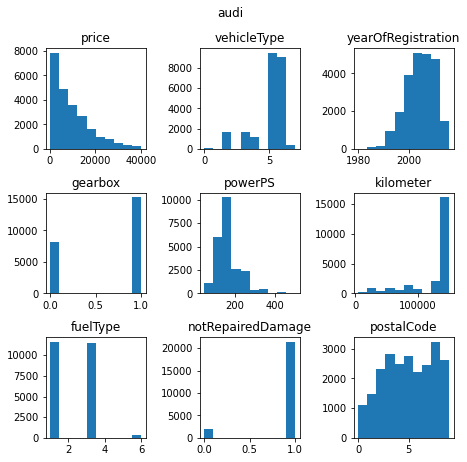

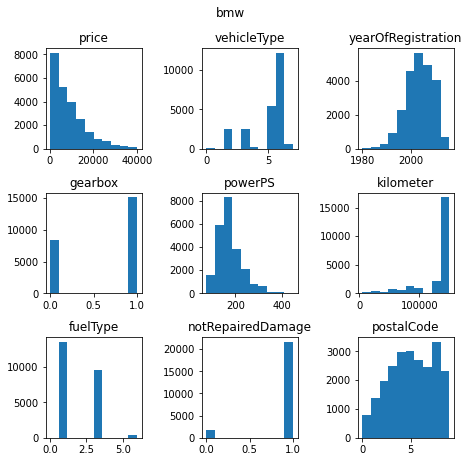

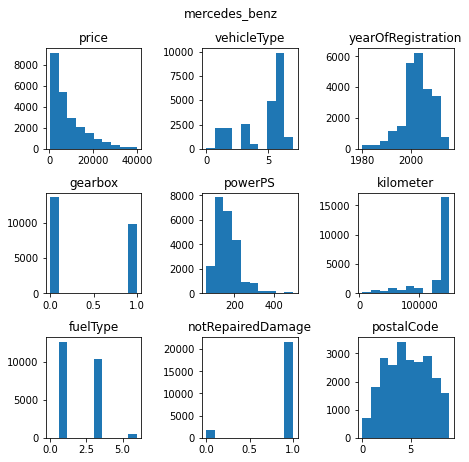

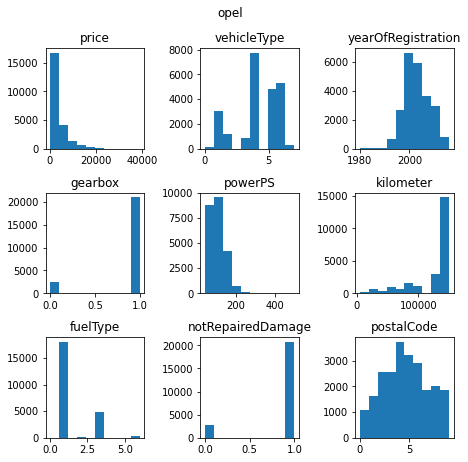

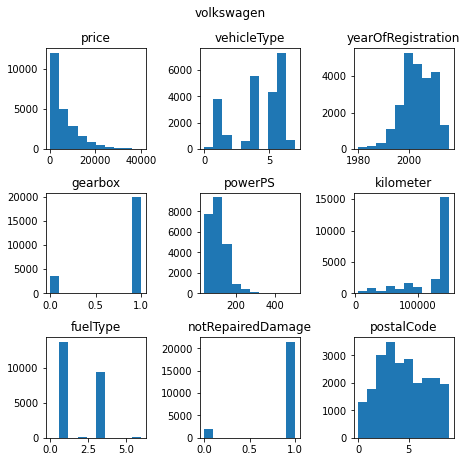

In [35]:
for brand in brands:
    df[df['brand']==brand][X.columns].hist(figsize=(6.5,6.5), grid=False)
    plt.suptitle(brand)
    plt.tight_layout()

In [36]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4])

## Split dataset with train_test_split

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=y_train)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (70341, 9)
X_val shape: (23447, 9)
X_test shape: (23447, 9)
y_train shape: (70341,)
y_val shape: (23447,)
y_test shape: (23447,)


# RandomForestCassifier

## #1 Model

### Train model

In [38]:
model = RandomForestClassifier(max_features = None)

params = {'max_depth': [14, 15, 16], 
            'min_samples_split': [4, 5, 6],
            'min_samples_leaf': [2, 3, 4]}

gs = GridSearchCV(estimator = model, param_grid = params, cv = 10)

gs.fit(X_train, y_train)

model.fit(X_train, y_train)
pred = model.predict(X_train)

print(classification_report(y_train, pred))
print(f'Best score:', {gs.best_score_})
print(f'Best estimator:', {gs.best_estimator_})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14068
           1       1.00      1.00      1.00     14068
           2       1.00      1.00      1.00     14069
           3       0.99      1.00      1.00     14068
           4       1.00      0.99      0.99     14068

    accuracy                           1.00     70341
   macro avg       1.00      1.00      1.00     70341
weighted avg       1.00      1.00      1.00     70341

Best score: {0.8031446690346957}
Best estimator: {RandomForestClassifier(max_depth=16, max_features=None, min_samples_leaf=2,
                       min_samples_split=4)}


In [39]:
def conf_matrix_disp(estimator, X, y, classes):
    fig, ax = plt.subplots(figsize = (8, 8))
    cmd = ConfusionMatrixDisplay.from_estimator(estimator, X, y, display_labels = classes, ax = ax)
    ax.grid(False)

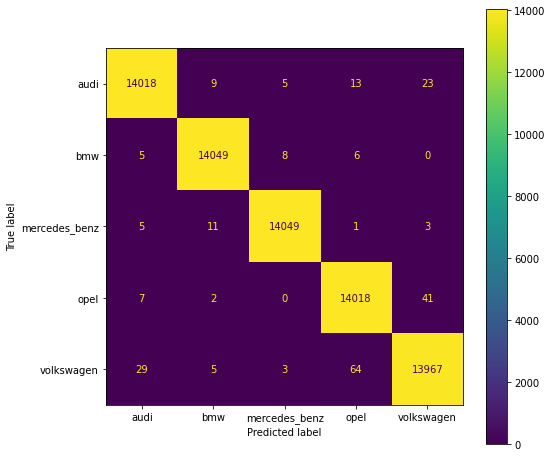

In [40]:
conf_matrix_disp(model, X_train, y_train, le.classes_)

In [41]:
tr = export_text(model.estimators_[0])
print(tr)

|--- feature_4 <= 107.50
|   |--- feature_4 <= 101.50
|   |   |--- feature_4 <= 80.50
|   |   |   |--- feature_0 <= 1462.50
|   |   |   |   |--- feature_2 <= 1994.50
|   |   |   |   |   |--- feature_4 <= 58.50
|   |   |   |   |   |   |--- feature_2 <= 1991.50
|   |   |   |   |   |   |   |--- feature_0 <= 374.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 4.00
|   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |--- feature_8 >  4.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 325.00
|   |   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  325.00
|   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |   |--- feature_0 >  374.50
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |--- feature_2 >  1991.50
|   |   |   |   |   |   |   |--- feature_4 <= 52.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 970.00
|   |   |   |   |   |   |   |  

### Validation model

In [42]:
val_pred = model.predict(X_val)

print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4689
           1       0.83      0.85      0.84      4690
           2       0.85      0.84      0.85      4689
           3       0.85      0.85      0.85      4689
           4       0.76      0.74      0.75      4690

    accuracy                           0.81     23447
   macro avg       0.81      0.81      0.81     23447
weighted avg       0.81      0.81      0.81     23447



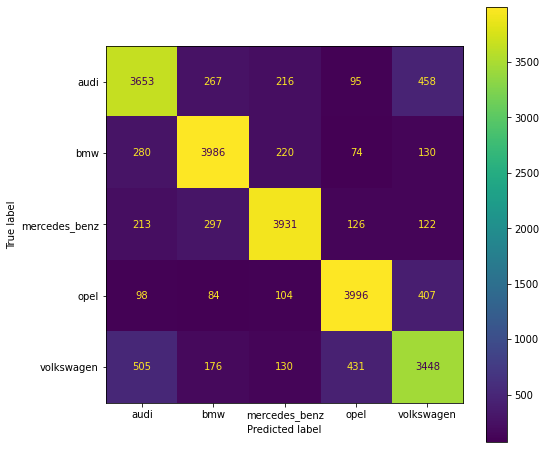

In [43]:
conf_matrix_disp(model, X_val, y_val, le.classes_)

## #2 Model

### Train model

In [44]:
model_2 = RandomForestClassifier()

params_2 = {'max_depth': [14, 15, 16],
            'min_samples_split': [4, 5, 6]}

gs_2 = GridSearchCV(estimator = model_2, param_grid = params, cv = 10)

gs_2.fit(X_train, y_train)

model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_train)

print(classification_report(y_train, pred_2))
print(f'Best score:', {gs_2.best_score_})
print(f'Best estimator:', {gs_2.best_estimator_})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14068
           1       1.00      1.00      1.00     14068
           2       1.00      1.00      1.00     14069
           3       0.99      1.00      1.00     14068
           4       0.99      0.99      0.99     14068

    accuracy                           1.00     70341
   macro avg       1.00      1.00      1.00     70341
weighted avg       1.00      1.00      1.00     70341

Best score: {0.7794600578487796}
Best estimator: {RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=5)}


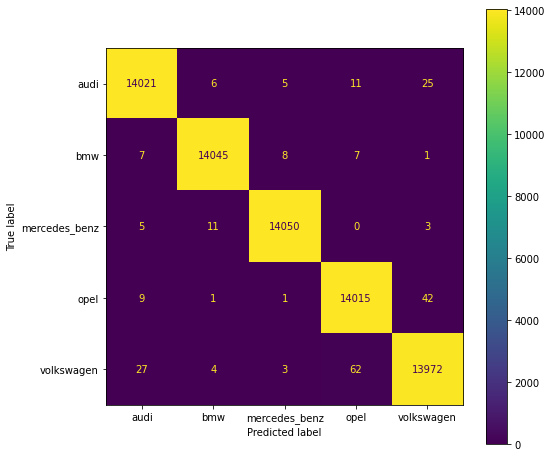

In [45]:
conf_matrix_disp(model_2, X_train, y_train, le.classes_)

In [46]:
tr_2 = export_text(model_2.estimators_[0])
print(tr_2)

|--- feature_4 <= 101.50
|   |--- feature_4 <= 80.50
|   |   |--- feature_0 <= 1510.00
|   |   |   |--- feature_1 <= 5.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_5 <= 22500.00
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- feature_5 >  22500.00
|   |   |   |   |   |   |--- feature_5 <= 65000.00
|   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |--- feature_5 >  65000.00
|   |   |   |   |   |   |   |--- feature_2 <= 2000.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 2.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 1999.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  1999.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |  

### Validation model

In [47]:
val_pred_2 = model_2.predict(X_val)

print(classification_report(y_val, val_pred_2))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4689
           1       0.81      0.84      0.82      4690
           2       0.83      0.83      0.83      4689
           3       0.84      0.84      0.84      4689
           4       0.76      0.72      0.74      4690

    accuracy                           0.80     23447
   macro avg       0.80      0.80      0.80     23447
weighted avg       0.80      0.80      0.80     23447



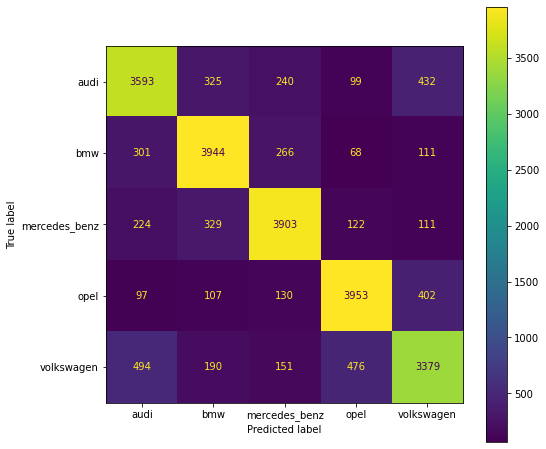

In [48]:
conf_matrix_disp(model_2, X_val, y_val, le.classes_)

## Test model

In [49]:
test_pred = model.predict(X_test)
test_pred_2 = model_2.predict(X_test)

print(classification_report(y_test, test_pred))
print('___________________')
print(classification_report(y_test, test_pred_2))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4690
           1       0.82      0.85      0.84      4689
           2       0.85      0.85      0.85      4689
           3       0.84      0.84      0.84      4690
           4       0.76      0.72      0.74      4689

    accuracy                           0.81     23447
   macro avg       0.81      0.81      0.81     23447
weighted avg       0.81      0.81      0.81     23447

___________________
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4690
           1       0.80      0.84      0.82      4689
           2       0.84      0.83      0.84      4689
           3       0.83      0.83      0.83      4690
           4       0.76      0.72      0.74      4689

    accuracy                           0.80     23447
   macro avg       0.80      0.80      0.80     23447
weighted avg       0.80      0.80      0.80     23447



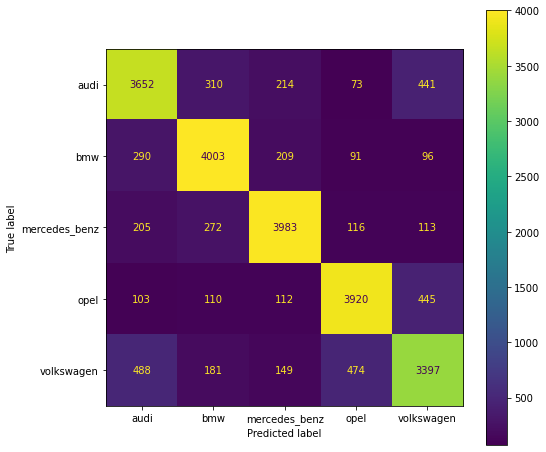

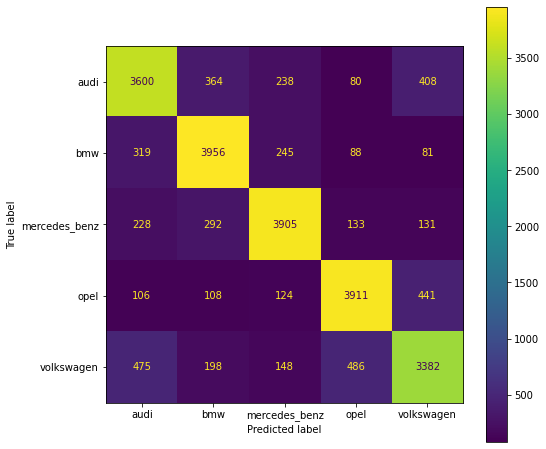

In [50]:
conf_matrix_disp(model, X_test, y_test, le.classes_)
conf_matrix_disp(model_2, X_test, y_test, le.classes_)

# XGBoost

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     14068
           1       0.80      0.90      0.85     14068
           2       0.87      0.84      0.85     14069
           3       0.85      0.88      0.86     14068
           4       0.81      0.73      0.77     14068

    accuracy                           0.83     70341
   macro avg       0.83      0.83      0.83     70341
weighted avg       0.83      0.83      0.83     70341



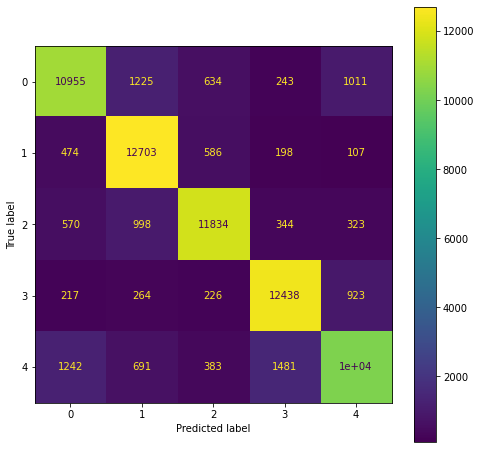

In [61]:
xgb = XGBClassifier()

params = {'max_depth': [1, 2, 3, 4, 5, 6, 7]}

xgb_gs = GridSearchCV(estimator = xgb, param_grid = params, cv = 10)

xgb.fit(X_train, y_train)

conf_matrix_disp(xgb, X_train, y_train, xgb.classes_)
scores = cross_val_score(xgb, X_train, y_train, cv = 5)

xgb_pred = xgb.predict(X_train)

print(classification_report(y_train, xgb_pred))